In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# These are the columns in the .txt data file
COLUMNS = [
    'Nothing',
    'Time',
    'Unsubtracted Weight',
    'Baseline Weight',
    'Program Temperature',
    'Sample Temperature',
    'Appox. Gas Flow',
    'R25 Diagnostic Temperature',
]

# I start collecting data at 20 C,
# but don't plot data until 30 C
# because sometimes the first few
# degrees look funky - up to you
# if you want to change this.
MIN_TEMP_FOR_ANALYSIS = 30

# How many data points to average
# when smoothing your data.
# This depends a lot on your data.
# Try numbers between 5-100 and
# see what looks good to you.
NUM_ROLLING_AVG = 100

In [3]:
# List of sample files to import
# Format for each entry is
# ['filename (without .txt extension)', 'sample name -- to be displayed on graph']
samples = [
    ['silica_fume', 'Silica fume'],
    ['hydromagnesite', 'Hydromagnesite'],
]

all_data = []

for s in samples:
    # Import each data file and skip first 30 rows of garbage
    data = pd.read_csv(s[0] + '.txt', delimiter='\t', skiprows=30)
    data.columns = COLUMNS
    
    # I find that my sample files sometimes have duplicate
    # entries for the same sample temperature, so I delete those
    data = data.drop_duplicates(subset=['Sample Temperature'])

    # Calculate weight percent based on initial weight
    data['Weight Percent'] = data['Unsubtracted Weight']/data['Unsubtracted Weight'][0] * 100
    
    # Calculate derivative of weight % with respect to sample temperature
    data['dUS/dST'] = np.gradient(data['Weight Percent'], data['Sample Temperature'])
    
    # Set sample name
    data['Sample'] = s[1]

    # Ignore data below the min temp you set above
    data = data[data['Sample Temperature'] > MIN_TEMP_FOR_ANALYSIS]
    
    # Scale the weight % so all samples are at 100% starting at MIN_TEMP_FOR_ANALYSIS
    scale = list(100/data.nsmallest(1, 'Time')['Weight Percent'])[0]
    data['Weight Percent Scaled'] = data['Weight Percent'].multiply(scale)
    
    # Smooth derivative curve
    data['dUS/dST smooth'] = data['dUS/dST'].rolling(NUM_ROLLING_AVG).mean()
    
    all_data.append(data)
    
df = pd.concat(all_data, axis=0, ignore_index=True)

Text(0, 0.5, 'Weight (%)')

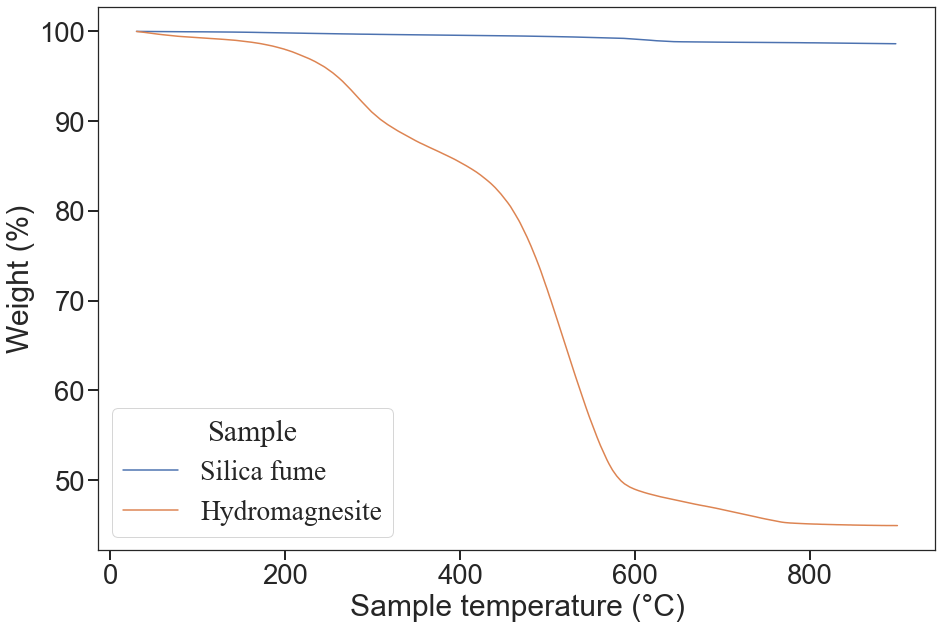

In [8]:
# Plot sample weight percent vs sample temperature

sns.set(font_scale = 2.5)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=True, width=2, length=10)
plt.rcParams["font.family"] = "Times New Roman"

plot = sns.lineplot(
    data=df,
    x="Sample Temperature",
    y="Weight Percent Scaled",
    hue="Sample"
)

# Set x and y labels
plot.set_xlabel("Sample temperature (°C)")
plot.set_ylabel("Weight (%)")

# ------ Some optional graph settings that I frequently use -----

# Set x and y limits to zoom in on a certain section
# ax.set_xlim(200, 400)
# ax.set_ylim(80, 100)

# Draw a vertical line at a specific wavenumber
# plt.axvline(x=255, color='r', linestyle='--')

# Move lengend the the right side of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')

Text(0, 0.5, 'dUS/dST')

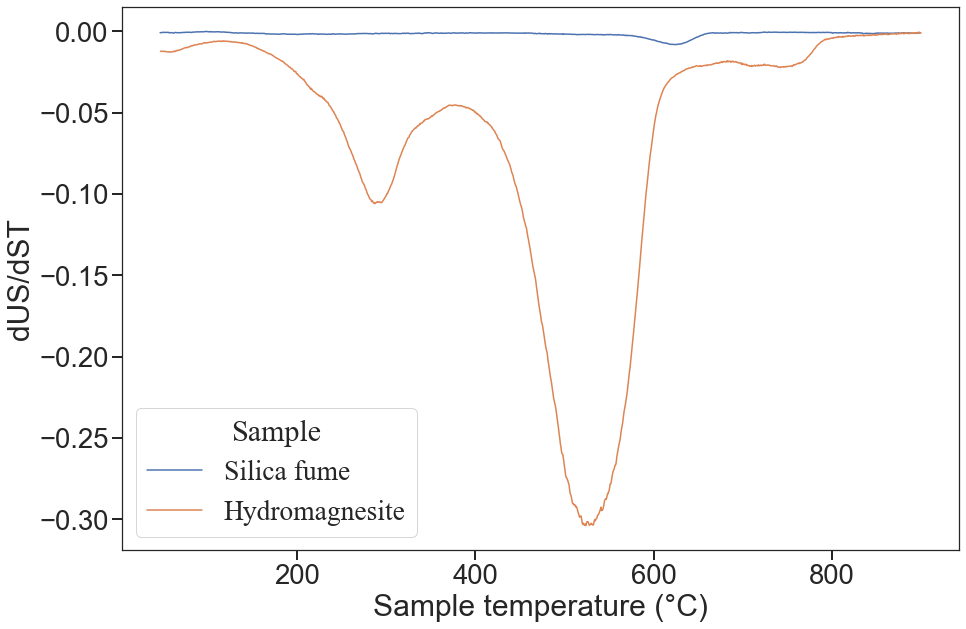

In [12]:
# Plot derivative vs sample temperature

sns.set(font_scale = 2.5)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=True, width=2, length=10)
plt.rcParams["font.family"] = "Times New Roman"

plot = sns.lineplot(
    data=df,
    x="Sample Temperature",
    y="dUS/dST smooth",
    hue="Sample"
)

# Set x and y labels
plot.set_xlabel("Sample temperature (°C)")
plot.set_ylabel("dUS/dST")

# ------ Some optional graph settings that I frequently use -----

# Set x and y limits to zoom in on a certain section
# ax.set_xlim(200, 400)
# ax.set_ylim(-0.15, 0)

# Draw a vertical line at a specific wavenumber
# plt.axvline(x=290, color='r', linestyle='--')

# Move lengend the the right side of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')